# Assignment
* Implement a Python script to calculate self-attention for a given input sequence. 
* The script should compute the self-attention mechanism without using any specialized libraries for neural networks and should be optimized to run efficiently on the CPU.

# Rubric
* (Done) Define a Python function that computes self-attention for a given input sequence. (5 Points)
* (Done) Implement the self-attention mechanism as described in the lecture, consisting of key, query, and value transformations. (5 Points)
* Ensure that the script is efficient and scaled-down, suitable for running on a CPU. Test the script with various input sequences of different lengths to ensure correctness and efficiency. (5 Points)
* Document your code with comments explaining each major step of the self-attention process. (5 Points)

Load Libraries

In [166]:
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Below, an array of sample sentences is created.

In [167]:
# pre-selected sample input array
sample_input_array = [
    {"1": "This is a test input."},
    {"2": "Chess, not checkers."},
    {"3": "Algorithms make the world go round."},
    {"4": "Financial Technology is my graduate program."},
    {"5": "UCF is in Florida."},
    {"6": "I am from Florida. The year is 2024 and I am a graduate student. This team is Team Number 1."},
    {"7": "The only thing we have to fear is fear itself."},
    {"8": "I think, therefore I am."},
    {"9": "To be, or not to be, that is the question."},
    {"10": "A journey of a thousand miles begins with a single step."},
    {"11": "I have a dream."},
    {"12": "Knowledge is power."},
    {"13": "Time is money."},
    {"14": "The pen is mightier than the sword."},
    {"15": "An eye for an eye only ends up making the whole world blind."},
    {"16": "In the end, we will remember not the words of our enemies, but the silence of our friends."}
]

Below, the logic of which sample input is used in the run is decided. It can be randomly selected with the np.random library. Otherwise, It can be set to a specific number to keep testing the same input.

In [168]:
array_input_number = np.random.randint(1, 17)
text_to_tokenize = sample_input_array[array_input_number - 1][str(array_input_number)]

Next, the text is tokenized by calling the tokenize function below and stored in the variable 'tokens'.

In [169]:
def tokenize(text_to_tokenize):
    # Tokenizes text into words, separating out punctuation since this is a common NLP task
    tokens = re.findall(r'\b\w+\b|\S', text_to_tokenize.lower())
    return tokens

tokens = tokenize(text_to_tokenize)

Below, we proceed to vectorize the tokens and store them in a variable. Vectorizing involves creating a one-dimensional array of float integers, which makes the Python code more readable for the computer. In this case, we use the Count of Words vectorizer, which provides a weighted interpretation for the model.

In [170]:
def count_vectorize(tokens):
    word_counts = {}
    for word in tokens:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
    return word_counts

vector = count_vectorize(tokens)

The print statements below will tell us the tokenized text and the vectorized tokens.

In [171]:
tokens_df = pd.DataFrame(tokens)
print('Tokenization:', tokens_df)


print('\nCount Vectorization:', vector)

Tokenization:        0
0   time
1     is
2  money
3      .

Count Vectorization: {'time': 1, 'is': 1, 'money': 1, '.': 1}


Below, the one_hot_encode function converts tokens into one-hot vector embeddings, which are then used by the self_attention function to compute the self-attention mechanism. This process is essential for capturing the relationships and dependencies within the input sequence.


In [172]:
def one_hot_encode(tokens):
    # Create a list of unique words
    unique_words = list(set(tokens))

    # Create a dictionary that maps each word to a unique index
    word_to_index = {word: index for index, word in enumerate(unique_words)}

    # Create a one-hot encoding for each word
    one_hot_vectors = np.eye(len(unique_words))

    # Map each word in the input sequence to its one-hot encoding
    embeddings = [one_hot_vectors[word_to_index[word]] for word in tokens]

    return embeddings

Below, the self_attention function calculates the attention scores.

Because np.random is used throughout this notebook, it is important to have different seeds so that the generated numbers are different. 
The get_state() function captures the current np.random state, which is then changed in the next line to be a seed of 659148. The seed state is restored after the weighted values are calculated.
Non-weighted Query, Key and Value values are calculated.

Next, the raw attention scores are calculated with dot matrix multiplication. The raw attention scores are scaled by the inverse square root of the dimensionality of the key vectors. This scales down the scores which helps stabilize gradients and improve efficiency during training.

Next, the SoftMax method is implemented to normalize the the scaled attention scores to a value between 0 and 1, where the entire matrices row sum will total 1. This converts the attention scores into interpretable probabilities.

In [173]:
def self_attention(input_sequence, embed_dimension):
    # Save the current state of the numpy random number generator
    initial_state = np.random.get_state()

    # Set the seed and initialize weight matrices
    np.random.seed(659148)
    WQ = np.random.rand(embed_dimension, embed_dimension)
    WK = np.random.rand(embed_dimension, embed_dimension)
    WV = np.random.rand(embed_dimension, embed_dimension)

    # Restore the previous state of the numpy random number generator
    np.random.set_state(initial_state)

    # Calculate non-weighted Q, K, V
    Q = np.dot(input_sequence, WQ)
    K = np.dot(input_sequence, WK)
    V = np.dot(input_sequence, WV)

    # caculate raw attention scores, then scale them down in prep for noramalization
    attention_scores = np.dot(Q, K.T) / np.sqrt(embed_dimension)

    # Normalize the attention scores via SoftMax methodology
    attention_scores = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=-1, keepdims=True)

    # Here, np.dot(attention_scores, V) multiplies the attention scores matrix and the value vectors matrix
    output = np.dot(attention_scores, V)

    return output,attention_scores

Below, the embeddings are saved to a variable and the embedded dimensions variable is declared and intialized.
Next, the self-attention function is called and returns the output and attention_scores values which are stored in the respective variables.

The print statement reflects the self-attention scors for the entire input text.

In [174]:
embeddings = one_hot_encode(tokens)

# Set embed_dimension to the length of the unique words list
embed_dimension = len(set(tokens))

# Call the self_attention function
output, attention_scores = self_attention(embeddings, embed_dimension)
output_df = pd.DataFrame(output)
print('Self-Attention Output:\n', output_df)


Self-Attention Output:
           0         1         2         3
0  0.357096  0.645135  0.846032  0.251824
1  0.333293  0.656604  0.831611  0.273649
2  0.356653  0.639838  0.846890  0.250137
3  0.347911  0.642223  0.839994  0.262835


Below, the visualizations for the self attention score matrix heatmap is defined and called. 

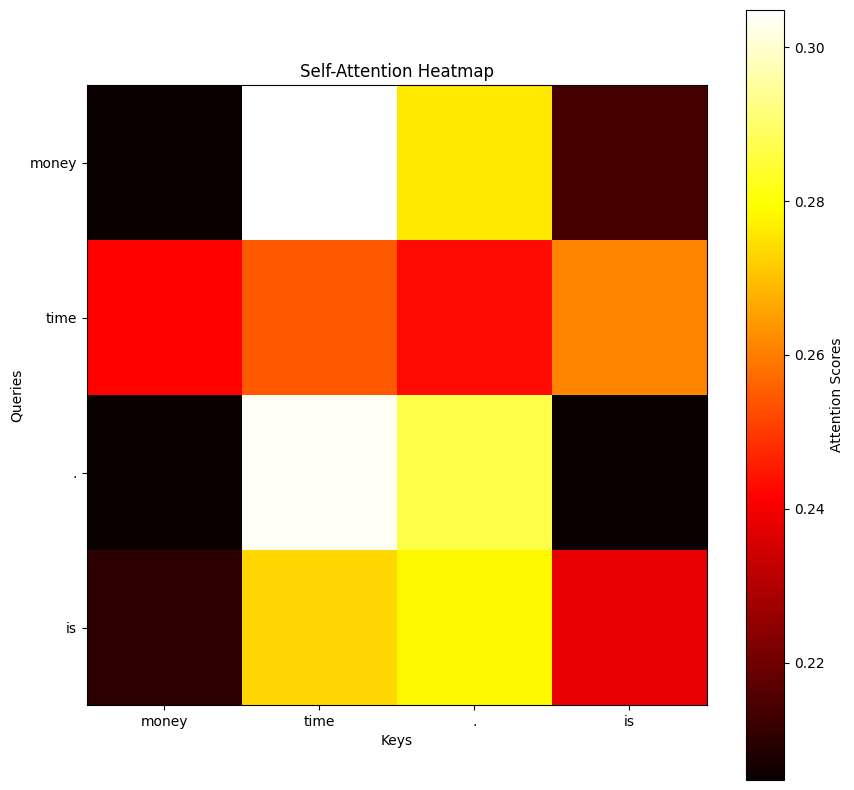

In [175]:
unique_words = list(set(tokens))
# Visualize the attention scores
plt.figure(figsize=(10, 10))
plt.imshow(attention_scores, cmap='hot', interpolation='nearest')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Attention Scores')

# Set the tick labels to be the words
plt.xticks(np.arange(len(unique_words)), unique_words)
plt.yticks(np.arange(len(unique_words)), unique_words)

# Add title and axis labels
plt.title('Self-Attention Heatmap')
plt.xlabel('Keys')
plt.ylabel('Queries')

plt.show()

Next, large inputs are accounted for and PCA is applied which will reduce the dimensionality of the attention-scores.

In [176]:
# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 dimensions
pca_output = pca.fit_transform(output)
pcadf = pd.DataFrame(data=pca_output, columns=['PC1', 'PC2'])
# Print the PCA output
print('PCA Output:\n', pcadf) 

PCA Output:
         PC1       PC2
0 -0.011871 -0.003636
1  0.025233 -0.001704
2 -0.014857  0.000499
3  0.001494  0.004841


Below, the PCA converted attention-scores are visualized.

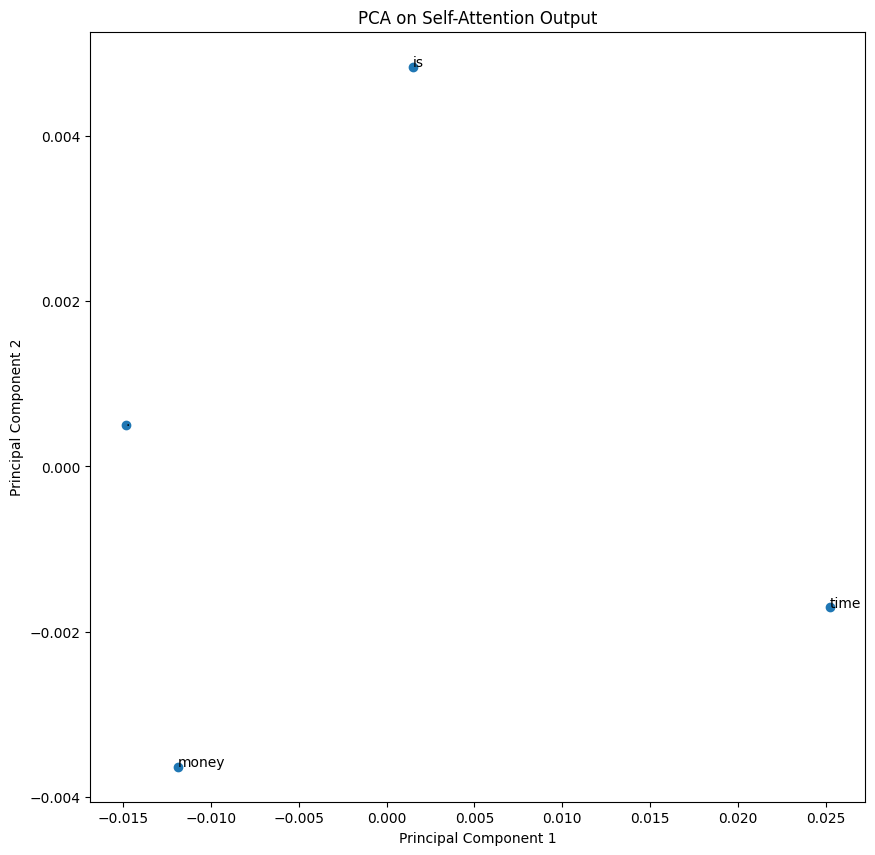

In [177]:
# Plot the PCA output
plt.figure(figsize=(10, 10))
plt.scatter(pca_output[:, 0], pca_output[:, 1])

for i, word in enumerate(unique_words):
    plt.annotate(word, (pca_output[i, 0], pca_output[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Self-Attention Output')
plt.show()